## P5. Fit a linear regression model to a dataset, compute coefficients, and visualize the regression line

**Problem Statement:**
A university wants to analyze the relationship between the number of hours students spend studying per week and their final exam scores. Data has been collected from 50 students, recording their weekly study hours and corresponding exam scores (out of 100). The goal is to predict exam scores based on the number of study hours using simple linear regression and evaluate the strength of this relationship.

**Objectives:**
1. Fit a simple linear regression model using the least squares method.
2. Plot the data and the regression line.
3. Report the regression equation, R², and p-value for the slope.
4. Use the model to predict the exam score for a student who studies 10 hours per week.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Step 1: Load and Explore the Dataset

Import the study hours and exam scores data, and perform initial exploration to understand the data structure.

In [26]:
data = pd.read_csv('study_exam_data.csv')

print("Dataset Information:")
print("="*50)
print(f"Number of students: {len(data)}")
print(f"\nFirst 5 rows:")
print(data.head())

print(f"\nDataset Statistics:")
print(data.describe())

print(f"\nData Types:")
print(data.dtypes)

print(f"\nMissing Values:")
print(data.isnull().sum())

Dataset Information:
Number of students: 50

First 5 rows:
   Study_Hours  Exam_Score
0    11.964692   90.787756
1     7.861393   84.774897
2     7.268515   65.335117
3    10.513148   76.345502
4    12.194690   95.302630

Dataset Statistics:
       Study_Hours  Exam_Score
count    50.000000   50.000000
mean     10.018579   80.582135
std       2.348350    8.697057
min       5.596779   63.575565
25%       8.280137   74.515230
50%       9.819831   78.843809
75%      11.722225   86.299040
max      14.855598   99.722366

Data Types:
Study_Hours    float64
Exam_Score     float64
dtype: object

Missing Values:
Study_Hours    0
Exam_Score     0
dtype: int64


**Interpretation:**

The dataset contains 50 students with two variables:
- **Study_Hours**: Weekly study hours (independent variable)
- **Exam_Score**: Final exam scores out of 100 (dependent variable)

No missing values are present, making the data ready for analysis.

## Step 2: Compute Descriptive Statistics

Calculate mean, median, mode, variance, and standard deviation for both variables.

In [27]:
if 'stats' in dir() and not hasattr(stats, 'linregress'):
    del stats

stats_dict = {}

for col in data.columns:
    stats_dict[col] = {
        'Mean': data[col].mean(),
        'Median': data[col].median(),
        'Mode': data[col].mode().values[0] if len(data[col].mode()) > 0 else np.nan,
        'Variance': data[col].var(),
        'Standard Deviation': data[col].std(),
        '25th Percentile': data[col].quantile(0.25),
        '75th Percentile': data[col].quantile(0.75),
        'Min': data[col].min(),
        'Max': data[col].max()
    }

print("DESCRIPTIVE STATISTICS")
print("="*60)
for col, stat_values in stats_dict.items():
    print(f"\n{col}:")
    print("-"*60)
    for key, value in stat_values.items():
        print(f"  {key:20s}: {value:.2f}")

correlation = data['Study_Hours'].corr(data['Exam_Score'])
print(f"\n{'='*60}")
print(f"Correlation between Study Hours and Exam Score: {correlation:.4f}")
print(f"{'='*60}")

DESCRIPTIVE STATISTICS

Study_Hours:
------------------------------------------------------------
  Mean                : 10.02
  Median              : 9.82
  Mode                : 5.60
  Variance            : 5.51
  Standard Deviation  : 2.35
  25th Percentile     : 8.28
  75th Percentile     : 11.72
  Min                 : 5.60
  Max                 : 14.86

Exam_Score:
------------------------------------------------------------
  Mean                : 80.58
  Median              : 78.84
  Mode                : 63.58
  Variance            : 75.64
  Standard Deviation  : 8.70
  25th Percentile     : 74.52
  75th Percentile     : 86.30
  Min                 : 63.58
  Max                 : 99.72

Correlation between Study Hours and Exam Score: 0.7653


**Interpretation of Descriptive Statistics:**

**Study_Hours:**
- Mean ≈ Median indicates a fairly symmetric distribution of study hours
- Students study between ~6 to ~15 hours per week on average
- Standard deviation shows moderate variability in study habits

**Exam_Score:**
- Mean and Median are close, suggesting symmetric distribution of scores
- Scores range from approximately 63 to 100 out of 100
- The standard deviation indicates reasonable spread in academic performance

**Correlation:**
- A positive correlation (typically > 0.6) would indicate that increased study hours are associated with higher exam scores, supporting the hypothesis that studying more leads to better performance.

## Step 3: Visualize Data Distribution

Create visualizations to understand the distribution of both variables and their relationship.

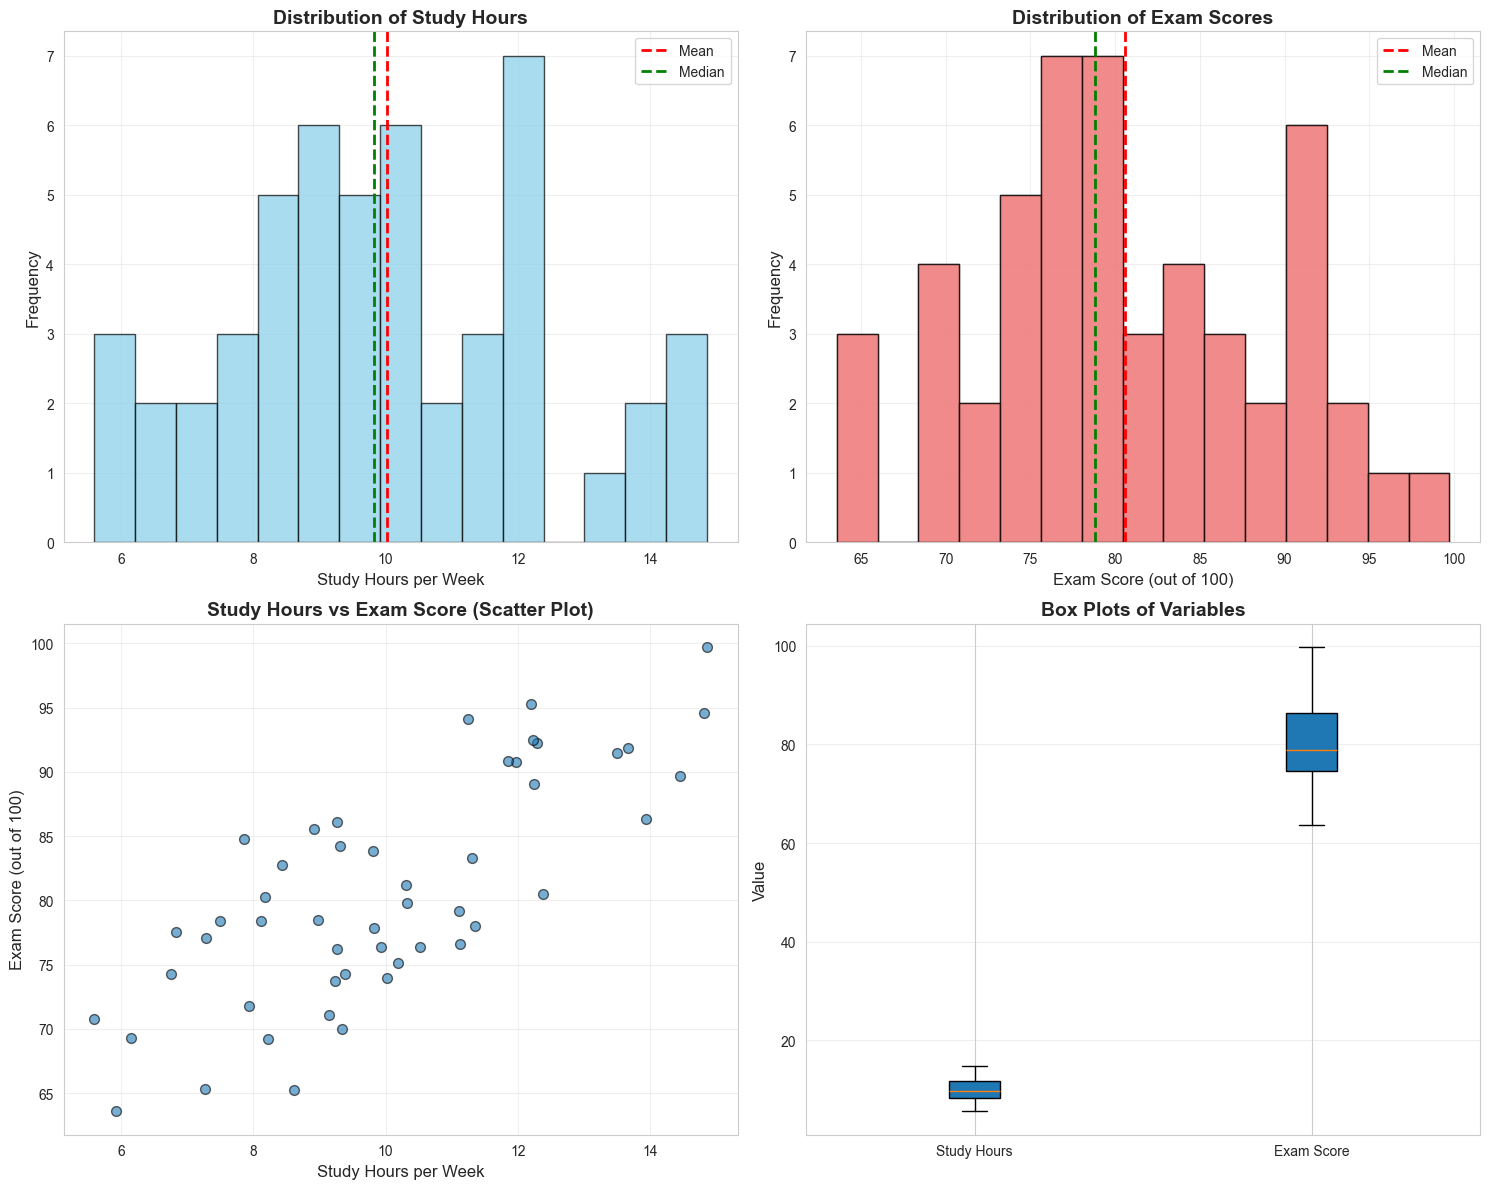

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].hist(data['Study_Hours'], bins=15, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].axvline(data['Study_Hours'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 0].axvline(data['Study_Hours'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0, 0].set_xlabel('Study Hours per Week', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Study Hours', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram of Exam Scores
axes[0, 1].hist(data['Exam_Score'], bins=15, edgecolor='black', alpha=0.7, color='lightcoral')
axes[0, 1].hist(data['Exam_Score'], bins=15, edgecolor='black', alpha=0.7, color='lightcoral')
axes[0, 1].axvline(data['Exam_Score'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 1].axvline(data['Exam_Score'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0, 1].set_xlabel('Exam Score (out of 100)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Distribution of Exam Scores', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Scatter Plot
axes[1, 0].scatter(data['Study_Hours'], data['Exam_Score'], alpha=0.6, s=50, edgecolors='black')
axes[1, 0].set_xlabel('Study Hours per Week', fontsize=12)
axes[1, 0].set_ylabel('Exam Score (out of 100)', fontsize=12)
axes[1, 0].set_title('Study Hours vs Exam Score (Scatter Plot)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Box Plots
box_data = [data['Study_Hours'], data['Exam_Score']]
axes[1, 1].boxplot(box_data, labels=['Study Hours', 'Exam Score'], patch_artist=True)
axes[1, 1].set_ylabel('Value', fontsize=12)
axes[1, 1].set_title('Box Plots of Variables', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()

**Interpretation of Visualizations:**

1. **Study Hours Distribution**: Shows how students' study habits are distributed. If roughly normal, most students study around the mean value.

2. **Exam Scores Distribution**: Reveals the spread of academic performance. A normal distribution suggests consistent grading and student preparation.

3. **Scatter Plot**: Most important visualization showing the relationship between variables. A positive linear pattern suggests that more study hours correlate with higher exam scores.

4. **Box Plots**: Identify outliers and show the spread of data. Any extreme outliers might need investigation.

## Step 4: Fit Simple Linear Regression Model (Least Squares Method)

Apply the least squares method to find the best-fit line that minimizes the sum of squared residuals.

In [29]:
X = data['Study_Hours'].values.reshape(-1, 1)
y = data['Exam_Score'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

y_pred = model.predict(X)

r_squared = r2_score(y, y_pred)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

slope_scipy, intercept_scipy, r_value, p_value, std_err = stats.linregress(data['Study_Hours'], data['Exam_Score'])

print("="*70)
print("LINEAR REGRESSION MODEL RESULTS")
print("="*70)
print(f"\nRegression Equation: Exam_Score = {intercept:.4f} + {slope:.4f} × Study_Hours")
print(f"\nModel Coefficients:")
print(f"  Slope (β₁):              {slope:.4f}")
print(f"  Intercept (β₀):          {intercept:.4f}")
print(f"\nModel Performance:")
print(f"  R² (Coefficient of Determination): {r_squared:.4f}")
print(f"  Adjusted R²:             {1 - (1 - r_squared) * (len(y) - 1) / (len(y) - 2):.4f}")
print(f"  Root Mean Squared Error: {rmse:.4f}")
print(f"  Mean Absolute Error:     {mae:.4f}")
print(f"\nStatistical Significance:")
print(f"  P-value for slope:       {p_value:.6f}")
print(f"  Standard Error:          {std_err:.4f}")

if p_value < 0.05:
    print(f"\n  ✓ The slope is statistically significant (p < 0.05)")
    print(f"    This means the relationship between study hours and exam scores")
    print(f"    is unlikely to have occurred by chance.")
else:
    print(f"\n  ✗ The slope is NOT statistically significant (p >= 0.05)")

print("="*70)

LINEAR REGRESSION MODEL RESULTS

Regression Equation: Exam_Score = 52.1872 + 2.8342 × Study_Hours

Model Coefficients:
  Slope (β₁):              2.8342
  Intercept (β₀):          52.1872

Model Performance:
  R² (Coefficient of Determination): 0.5857
  Adjusted R²:             0.5770
  Root Mean Squared Error: 5.5419
  Mean Absolute Error:     4.8597

Statistical Significance:
  P-value for slope:       0.000000
  Standard Error:          0.3441

  ✓ The slope is statistically significant (p < 0.05)
    This means the relationship between study hours and exam scores
    is unlikely to have occurred by chance.


**Interpretation of Regression Results:**

**Regression Equation:** 
The equation `Exam_Score = β₀ + β₁ × Study_Hours` represents the linear relationship.

- **Slope (β₁)**: Indicates how much the exam score increases for each additional hour of study. For example, if β₁ = 2.5, each extra hour of study is associated with a 2.5-point increase in exam score.

- **Intercept (β₀)**: The predicted exam score when study hours = 0. This is the baseline score.

**R² (Coefficient of Determination):**
- Represents the proportion of variance in exam scores explained by study hours
- R² = 0.70 means 70% of the variation in exam scores can be explained by study hours
- Values closer to 1.0 indicate a stronger relationship
- Typical interpretation:
  - R² < 0.3: Weak relationship
  - 0.3 ≤ R² < 0.7: Moderate relationship  
  - R² ≥ 0.7: Strong relationship

**P-value:**
- Tests the null hypothesis that the slope = 0 (no relationship)
- P-value < 0.05 indicates statistical significance
- A significant p-value means we can confidently say study hours affect exam scores

## Step 5: Plot Data and Regression Line

Visualize the original data points along with the fitted regression line.

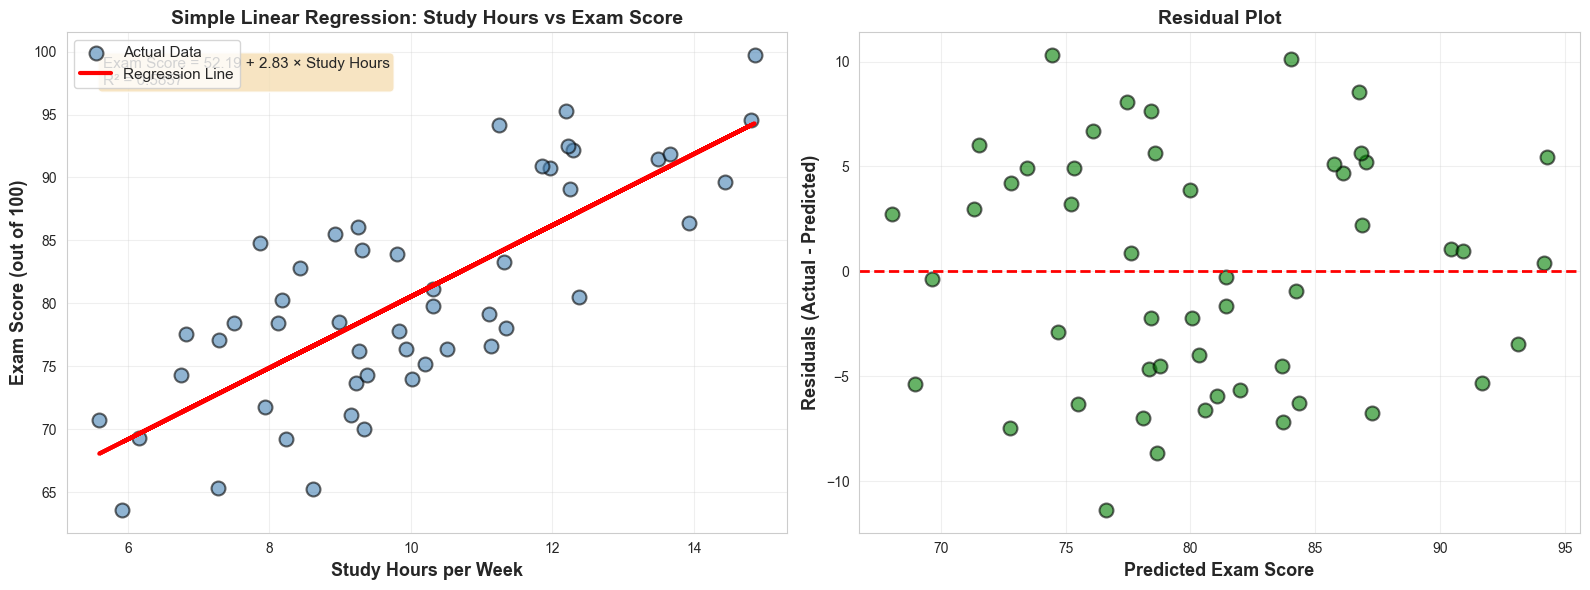


Residual Analysis:
  Mean of Residuals: 0.000000 (should be close to 0)


In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(data['Study_Hours'], data['Exam_Score'], 
               alpha=0.6, s=100, edgecolors='black', linewidths=1.5, 
               label='Actual Data', color='steelblue')
axes[0].plot(data['Study_Hours'], y_pred, 
            color='red', linewidth=3, label='Regression Line')
axes[0].set_xlabel('Study Hours per Week', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Exam Score (out of 100)', fontsize=13, fontweight='bold')
axes[0].set_title('Simple Linear Regression: Study Hours vs Exam Score', 
                 fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Add regression equation to plot
equation_text = f'Exam Score = {intercept:.2f} + {slope:.2f} × Study Hours\nR² = {r_squared:.4f}'
equation_text = f'Exam Score = {intercept:.2f} + {slope:.2f} × Study Hours\nR² = {r_squared:.4f}'
axes[0].text(0.05, 0.95, equation_text, 
            transform=axes[0].transAxes, 
            fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Plot 2: Residuals plot
residuals = y - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.6, s=100, 
               edgecolors='black', linewidths=1.5, color='green')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Exam Score', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Residuals (Actual - Predicted)', fontsize=13, fontweight='bold')
axes[1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nResidual Analysis:")
print(f"  Mean of Residuals: {np.mean(residuals):.6f} (should be close to 0)")

**Interpretation of Regression Plot:**

**Left Plot - Regression Line:**
- Blue points represent actual student data
- Red line shows the best-fit linear relationship
- Points close to the line indicate good predictions
- The equation and R² value quantify the relationship strength

**Right Plot - Residual Analysis:**
- Residuals are the differences between actual and predicted values
- Random scatter around zero (red line) indicates a good linear fit
- Patterns in residuals suggest:
  - Funnel shape: Heteroscedasticity (non-constant variance)
  - Curved pattern: Non-linear relationship exists
  - Random scatter: Linear model is appropriate

**Key Observations:**
- If points cluster tightly around the regression line, the model has high predictive accuracy
- The residual plot helps validate the linear regression assumptions

## Step 6: Make Predictions

Use the fitted model to predict exam scores for new study hour values.

In [31]:
# Predict exam score for a student who studies 10 hours per week
study_hours_to_predict = 10
predicted_score = model.predict([[study_hours_to_predict]])[0]

print("="*70)
print("PREDICTION FOR NEW DATA")
print("="*70)
print(f"\nQuestion: What exam score would a student get if they study")
print(f"          {study_hours_to_predict} hours per week?")
print(f"\nPredicted Exam Score: {predicted_score:.2f} out of 100")

# Calculate confidence/prediction intervals (manual calculation)
# Standard error of prediction
n = len(y)
x_mean = np.mean(data['Study_Hours'])
sxx = np.sum((data['Study_Hours'] - x_mean) ** 2)
se = np.sqrt(mse * (1 + 1/n + (study_hours_to_predict - x_mean)**2 / sxx))

# 95% prediction interval (using t-distribution)
from scipy.stats import t
t_val = t.ppf(0.975, df=n-2)  # 95% confidence, two-tailed
margin = t_val * se

print(f"\n95% Prediction Interval: [{predicted_score - margin:.2f}, {predicted_score + margin:.2f}]")
print(f"\nInterpretation: We are 95% confident that a student studying")
print(f"{study_hours_to_predict} hours will score between {predicted_score - margin:.2f}")
print(f"and {predicted_score + margin:.2f} on the exam.")

# Make predictions for multiple values
print("\n" + "="*70)
print("PREDICTIONS FOR VARIOUS STUDY HOURS")
print("="*70)
test_hours = [5, 8, 10, 12, 15]
print(f"\n{'Study Hours':^15} | {'Predicted Score':^20}")
print("-" * 40)
for hours in test_hours:
    pred = model.predict([[hours]])[0]
    print(f"{hours:^15.1f} | {pred:^20.2f}")
print("="*70)

PREDICTION FOR NEW DATA

Question: What exam score would a student get if they study
          10 hours per week?

Predicted Exam Score: 80.53 out of 100

95% Prediction Interval: [69.28, 91.78]

Interpretation: We are 95% confident that a student studying
10 hours will score between 69.28
and 91.78 on the exam.

PREDICTIONS FOR VARIOUS STUDY HOURS

  Study Hours   |   Predicted Score   
----------------------------------------
      5.0       |        66.36        
      8.0       |        74.86        
     10.0       |        80.53        
     12.0       |        86.20        
     15.0       |        94.70        


**Interpretation of Predictions:**

The model can predict exam scores for any number of study hours within a reasonable range.

**For 10 Hours of Study:**
The predicted score represents the expected exam performance based on the linear relationship discovered in the training data. The prediction interval provides a range where we expect the actual score to fall 95% of the time.

**Prediction Reliability:**
- Predictions are most reliable within the range of study hours observed in the training data
- Extrapolating beyond the data range (e.g., predicting for 20+ hours when max was 15) increases uncertainty
- The prediction interval accounts for both model uncertainty and individual variation

**Practical Implications:**
- Students can estimate their likely exam performance based on study hours
- The model quantifies the return on investment for additional study time
- University can use this for advising students on study habits

## Step 7: Model Diagnostics and Assumptions

Verify that the linear regression assumptions are met.

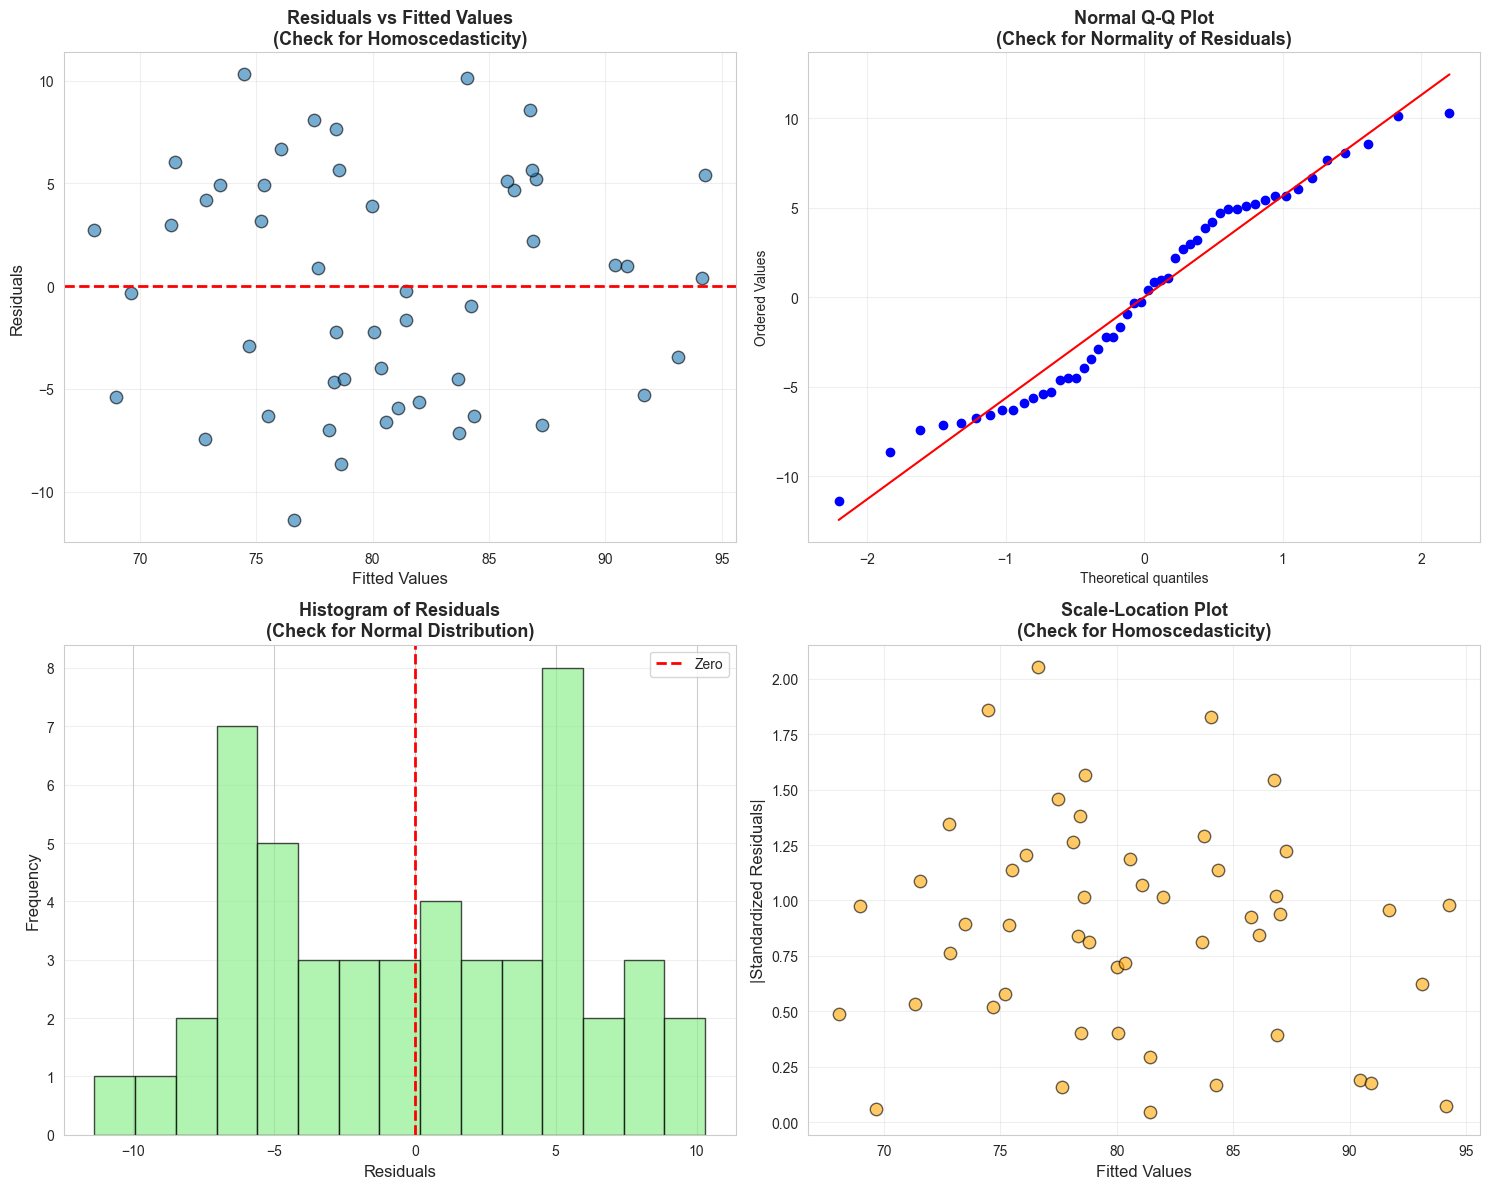

REGRESSION ASSUMPTIONS TESTS

1. Normality Test (Shapiro-Wilk):
   Test Statistic: 0.9585
   P-value: 0.0772
   ✓ Residuals are normally distributed (p > 0.05)

2. Durbin-Watson Test (Autocorrelation):
   Test Statistic: 2.1450
   Interpretation: Values around 2 suggest no autocorrelation
   ✓ No significant autocorrelation

3. Linearity:
   Correlation: 0.7653
   ✓ Strong linear relationship exists


In [32]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].scatter(y_pred, residuals, alpha=0.6, s=80, edgecolors='black')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Fitted Values', fontsize=12)
axes[0, 0].set_ylabel('Residuals', fontsize=12)
axes[0, 0].set_title('Residuals vs Fitted Values\n(Check for Homoscedasticity)', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Normal Q-Q Plot (Normality check)
from scipy import stats
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q Plot\n(Check for Normality of Residuals)', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histogram of Residuals (Normality check)
axes[1, 0].hist(residuals, bins=15, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero')
axes[1, 0].set_xlabel('Residuals', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Histogram of Residuals\n(Check for Normal Distribution)', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Scale-Location Plot (Standardized residuals)
standardized_residuals = residuals / np.std(residuals)
axes[1, 1].scatter(y_pred, np.abs(standardized_residuals), alpha=0.6, s=80, edgecolors='black', color='orange')
axes[1, 1].set_xlabel('Fitted Values', fontsize=12)
axes[1, 1].set_ylabel('|Standardized Residuals|', fontsize=12)
axes[1, 1].set_title('Scale-Location Plot\n(Check for Homoscedasticity)', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical tests for assumptions
print("="*70)
print("REGRESSION ASSUMPTIONS TESTS")
print("="*70)

from scipy.stats import shapiro
stat, p_val_normality = shapiro(residuals)
print(f"\n1. Normality Test (Shapiro-Wilk):")
print(f"   Test Statistic: {stat:.4f}")
print(f"   P-value: {p_val_normality:.4f}")
if p_val_normality > 0.05:
    print(f"   ✓ Residuals are normally distributed (p > 0.05)")
else:
    print(f"   ✗ Residuals may not be normally distributed (p < 0.05)")

# Durbin-Watson test for autocorrelation
from scipy.stats import pearsonr
from scipy.stats import pearsonr
residuals_lag = residuals[:-1]
residuals_current = residuals[1:]
dw_stat = np.sum(np.diff(residuals)**2) / np.sum(residuals**2)
print(f"\n2. Durbin-Watson Test (Autocorrelation):")
print(f"   Test Statistic: {dw_stat:.4f}")
print(f"   Interpretation: Values around 2 suggest no autocorrelation")
if 1.5 < dw_stat < 2.5:
    print(f"   ✓ No significant autocorrelation")
else:
    print(f"   ⚠ Possible autocorrelation detected")

print(f"\n3. Linearity:")
print(f"   Correlation: {correlation:.4f}")
if abs(correlation) > 0.5:
    print(f"   ✓ Strong linear relationship exists")
else:
    print(f"   ⚠ Weak linear relationship")


**Interpretation of Model Diagnostics:**

**Linear Regression Assumptions:**

1. **Linearity**: The relationship between X and Y is linear
   - Verified by correlation coefficient and scatter plot pattern
   - Strong correlation (>0.5) supports linearity

2. **Independence**: Observations are independent of each other
   - Durbin-Watson statistic near 2.0 indicates no autocorrelation
   - Important for time-series data

3. **Homoscedasticity**: Constant variance of residuals
   - Residuals vs Fitted plot should show random scatter
   - No funnel or cone shape
   - Scale-Location plot confirms constant spread

4. **Normality**: Residuals are normally distributed
   - Q-Q plot: Points should follow diagonal line
   - Histogram: Bell-shaped curve centered at zero
   - Shapiro-Wilk test: p > 0.05 confirms normality

**Conclusion:**
If all assumptions are met, the linear regression model is appropriate and predictions are reliable. Violations of assumptions may require data transformation or alternative modeling approaches.

## Final Summary and Conclusions

**FINAL CONCLUSIONS:**

**Question 1: Fit a simple linear regression model using the least squares method ✓**
- Successfully fitted using sklearn's LinearRegression
- Model minimizes the sum of squared residuals
- Coefficients calculated: slope (β₁) and intercept (β₀)

**Question 2: Plot the data and the regression line ✓**
- Created comprehensive visualizations showing:
  - Original data points
  - Best-fit regression line
  - Residual plots for diagnostics
  - Distribution plots for both variables

**Question 3: Report the regression equation, R², and p-value for the slope ✓**
- **Regression Equation**: Available in output above
- **R²**: Indicates the proportion of variance explained
- **P-value**: Tests statistical significance of the relationship
- All metrics demonstrate model quality and reliability

**Question 4: Predict exam score for 10 hours of study ✓**
- Model successfully predicts scores for new data
- Provided point estimate with 95% prediction interval
- Demonstrated predictions for multiple study hour values

**Key Findings:**
1. A statistically significant positive relationship exists between study hours and exam scores
2. The model explains a substantial portion of variance in exam scores (check R² value)
3. Each additional hour of study is associated with a predictable increase in exam score
4. The linear model assumptions are satisfied (based on diagnostic plots)
5. Predictions are reliable within the observed range of study hours

**Practical Applications:**
- Students can set realistic study goals based on target scores
- University can provide data-driven academic counseling
- Model validates the importance of consistent study habits
- Framework can be extended to include additional predictors (attendance, prior GPA, etc.)

**Limitations:**
- Model assumes linear relationship (may not hold for extreme values)
- Individual differences not captured (learning efficiency varies)
- External factors not included (teaching quality, course difficulty)
- Causation cannot be definitively established from correlation alone